In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score

In [29]:
df = pd.read_csv('https://storage.googleapis.com/kaggle-competitions-data/kaggle/10370/train.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1535396290&Signature=boHUWH8PbAV03itesOR18WqlWyw1g6DDxBsp74sysuA%2F8fJGDVgxVW9%2Fg6W1skxCNYIzkM6HmVh6VUj8uGf%2FAECkroceTEmf7CakKv8nDjOLauRQnm3W8VJ5yUehRf0mGQBR3Y2LCc9FfIE7ZhzL4hs2ZeS3LEOVW2mtfH1mUe6xh5xDZQApNOiJvSekrMb%2FCDArmR5r2Yz1Zf0yvaEDVSxpyxpFBigaSMZppKPrz3fYkQgTPtrgN9xAtN8mDAXU4zYw8Q4DJzk73IjrJMgot9XoxoLD766TGIk44bOnHTiGz%2FSJPOMyPnupcbOF3Lys%2Fd6isWRAum3H4eAyOMRXrw%3D%3D')

In [30]:
df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

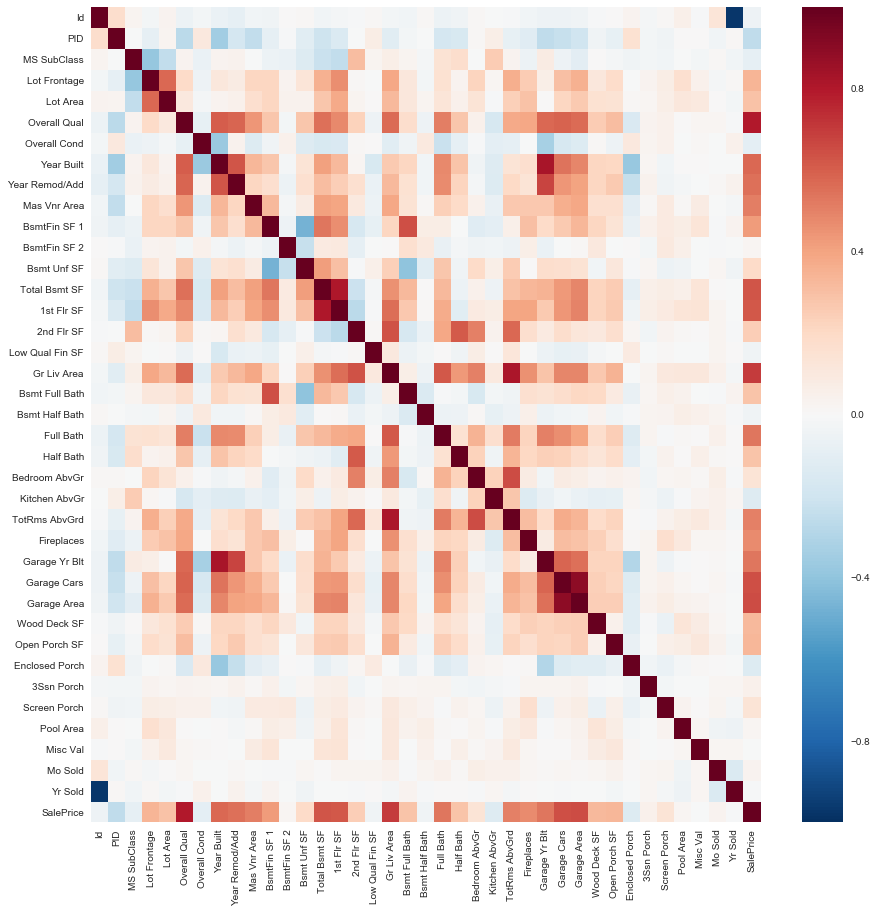

In [31]:
from matplotlib import pyplot
size = (15, 15)
fig, ax = pyplot.subplots(figsize=size)
sns.heatmap(df.corr())

In [32]:
#the following variables I want to separate out
#Overall Qual, Year Built, Year Remod/Add, Total Bsmt SF, 1st Flr SF, GR Liv Area, Garage Cars, Garage Area

In [80]:
df_C = df[['SalePrice', 'Id', 'Overall Qual', 'Year Built', 'Year Remod/Add',
           'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Garage Cars', 'Garage Area','Lot Area']]
df_C['totsqft'] = df['Total Bsmt SF'] * df['1st Flr SF']

/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [81]:
df_C.dropna(inplace = True)

/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [82]:
df_C.isnull().sum()

SalePrice         0
Id                0
Overall Qual      0
Year Built        0
Year Remod/Add    0
Total Bsmt SF     0
1st Flr SF        0
Gr Liv Area       0
Garage Cars       0
Garage Area       0
Lot Area          0
totsqft           0
dtype: int64

In [83]:
dfb = df_C[['Overall Qual', 'Year Built', 'Year Remod/Add',
            'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 
            'Garage Cars', 'Garage Area', 'Lot Area', 'totsqft']]

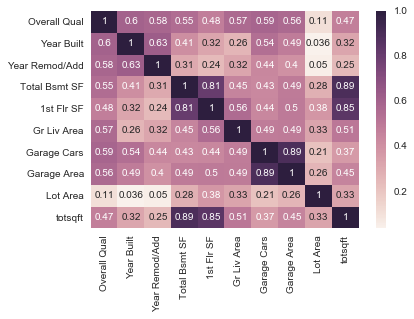

In [84]:
sns.heatmap(dfb.corr(), annot = True)

In [85]:
#sns.pairplot(dfb)

In [86]:
X = dfb[['Overall Qual', 'Year Built', 'Year Remod/Add',
            'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 
            'Garage Cars', 'Garage Area', 'Lot Area', 'totsqft']]
y = df_C['SalePrice']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [88]:
lr = LinearRegression()

In [89]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(lr, X_train, y_train, cv=kf)
scores.mean()

0.8002378303479304

In [90]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [91]:
lr.score(X,y)

0.8115592401428092

In [92]:
from sklearn.metrics import mean_squared_error as mse

y_hat = lr.predict(X)
df_C['y_hat'] = y_hat

#A:
mse(y, y_hat)

/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1183298005.4184532

In [93]:
df_C.head()

,SalePrice,Id,Overall Qual,Year Built,Year Remod/Add,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Cars,Garage Area,Lot Area,totsqft,y_hat
0,130500,109,6,1976,2005,725.0,725,1479,2.0,475.0,13517,525625.0,172176.159944
1,220000,544,7,1996,1997,913.0,913,2122,2.0,559.0,11492,833569.0,237900.697778
2,109000,153,5,1953,2007,1057.0,1057,1057,1.0,246.0,7922,1117249.0,130439.705193
3,174000,318,5,2006,2007,384.0,744,1444,2.0,400.0,9802,285696.0,135524.056984
4,138500,255,6,1900,1993,676.0,831,1445,2.0,484.0,14235,561756.0,151767.099214


In [94]:
lr.predict(X)

array([172176.15994364, 237900.69777781, 130439.7051925 , ...,
       168530.00884088, 114447.66973223, 219267.05180984])

In [95]:
np.sqrt(mse(y, y_hat))

34399.09890416395

In [96]:
#df_S = df_C[['Id', 'y_hat']]

In [97]:
#df_S

In [98]:
test_kaggle = pd.read_csv('https://storage.googleapis.com/kaggle-competitions-data/kaggle/10370/test.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1535397479&Signature=gFHgaD2o%2BBoUg0I2wjpqsgdfvWTiqucUlqYr4%2FDUCRVvtD9iMqL2ir69FibR01hF3dSCt8RgROpan5uQq0zk%2FPygjLWW9hQZkVWRRruBx9aLY3FiCdbpvVSdp%2BafTwm5OBYiHm0YMQOO1fjjmkFph6fTJr4kFqnboZWQk%2FosKo3uNZex0vcfHh2YmJzuN6t1VfvVSlkqAVNkeeJawd4%2FOlFXZofpbdhs9PB9xqA3fdWHr%2FBvfggmjFiF3uDMxzGimHORON%2B1R29wZHrz%2FR5R7KZ%2FHWwHYEknzBJ7AgvXXUxSFV5BBJVVs%2FLWiEHkEqmBnrIo7LIbJ428K9S6rlg8dw%3D%3D')

In [99]:
test_kaggle.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [109]:
ktest = test_kaggle[['Id','Overall Qual', 'Year Built', 'Year Remod/Add',
            'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 
            'Garage Cars', 'Garage Area', 'Lot Area']]
test_kaggle['totsqft'] = test_kaggle['Total Bsmt SF'] * test_kaggle['1st Flr SF']




b = test_kaggle[['Overall Qual', 'Year Built', 'Year Remod/Add',
            'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 
            'Garage Cars', 'Garage Area', 'Lot Area', 'totsqft']]

In [110]:
SalePrice = lr.predict(b)

In [111]:
ktest['SalePrice'] = SalePrice

/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [112]:
ktest = ktest[['Id', 'SalePrice']]

In [113]:
ktest.head()

,Id,SalePrice
0,2658,174056.615236
1,2718,211072.654827
2,2414,196720.139699
3,1989,126099.871736
4,625,183584.607435


In [114]:
ktest.to_csv('Friday2.csv', sep=',', index=False)

In [115]:
ktest.shape

(879, 2)